In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import shap
from SHAP_utils import calculateSHAP_values, getMostAbsoluteImportantFeatures 

In [3]:
import pm4py

In [4]:
route="07-21-2025_13-15-50"

In [5]:
clf=joblib.load("./results/Ours/"+route+"/clf_val_0.2.joblib")

In [6]:
dataset=pd.read_csv("./Data/road_traffic/mined_rtfm_relabelled_confidences.csv", index_col=0)
dataset = dataset.set_index('case:concept:name')

In [7]:
X=dataset.drop(columns=["Class"])

y=dataset['Class']
print("No. of features:"+str(len(X.columns)))

le = LabelEncoder()
print("Is na? "+str(X.isnull().values.any()))
y_transformed = le.fit_transform(y)
le_name_mapping = pd.Series(dict(zip(le.classes_,le.transform(le.classes_))))
cols=X.columns.to_list()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_transformed,
                                                    test_size=0.2,
                                                    stratify=y_transformed,
                                                    shuffle=True,
                                                    random_state=0)

No. of features:2189
Is na? True


In [8]:
best_class0=pd.read_csv("./results/Ours/"+route+"/best_predicted_instance_class0.csv").set_index("case:concept:name")
best_class1=pd.read_csv("./results/Ours/"+route+"/best_predicted_instance_class1.csv").set_index("case:concept:name")
best_class2=pd.read_csv("./results/Ours/"+route+"/best_predicted_instance_class2.csv").set_index("case:concept:name")
best_class3=pd.read_csv("./results/Ours/"+route+"/best_predicted_instance_class3.csv").set_index("case:concept:name")

In [9]:
original_log=pm4py.read_xes("./Data/road_traffic/RawData/Road_Traffic_Fine_Management_Process.xes")

ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:18<00:00, 8076.55it/s] 


In [10]:
le_name_mapping

credit_collection    0
dismissed            1
paid_full            2
unresolved           3
dtype: int32

In [11]:
shap_values_training, explainer_training=calculateSHAP_values(clf, X_train)

In [12]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [15]:
#Credit collection prototype:

In [12]:
best_class0

,'Absence(Add penalty)','Absence(Appeal to Judge)','Absence(Create Fine)','Absence(Insert Date Appeal to Prefecture)','Absence(Insert Fine Notification)','Absence(Notify Result Appeal to Offender)','Absence(Payment)','Absence(Receive Result Appeal from Prefecture)','Absence(Send Appeal to Prefecture)','Absence(Send Fine)',...,"'Succession(Send for Credit Collection, Add penalty)'","'Succession(Send for Credit Collection, Appeal to Judge)'","'Succession(Send for Credit Collection, Create Fine)'","'Succession(Send for Credit Collection, Insert Date Appeal to Prefecture)'","'Succession(Send for Credit Collection, Insert Fine Notification)'","'Succession(Send for Credit Collection, Notify Result Appeal to Offender)'","'Succession(Send for Credit Collection, Payment)'","'Succession(Send for Credit Collection, Receive Result Appeal from Prefecture)'","'Succession(Send for Credit Collection, Send Appeal to Prefecture)'","'Succession(Send for Credit Collection, Send Fine)'"
case:concept:name,,,,,,,,,,,,,,,,,,,,,
N34672,0.0,100.0,0.0,100.0,0.0,0.0,100.0,0.0,100.0,0.0,...,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0


In [14]:
original_log[original_log["case:concept:name"]==best_class0.index[0]]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
143529,32.8,538,NIL,Create Fine,A,0.0,complete,2001-06-25 00:00:00+00:00,157.0,0.0,N34672,NaN,NaN,NaN,NaN,NaN
143530,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2001-08-27 00:00:00+00:00,NaN,NaN,N34672,13.43,NaN,NaN,NaN,NaN
143531,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2001-09-17 00:00:00+00:00,NaN,NaN,N34672,NaN,P,N,NaN,NaN
143532,65.6,NaN,NaN,Add penalty,NaN,NaN,complete,2001-11-16 00:00:00+00:00,NaN,NaN,N34672,NaN,NaN,NaN,NaN,NaN
143533,NaN,NaN,NaN,Receive Result Appeal from Prefecture,NaN,NaN,complete,2001-12-11 00:00:00+00:00,NaN,NaN,N34672,NaN,NaN,NaN,NaN,NaN
143534,NaN,NaN,NaN,Notify Result Appeal to Offender,NaN,NaN,complete,2002-01-21 00:00:00+00:00,NaN,NaN,N34672,NaN,NaN,NaN,NaN,NaN
143535,NaN,NaN,NaN,Send for Credit Collection,NaN,NaN,complete,2003-01-10 00:00:00+00:00,NaN,NaN,N34672,NaN,NaN,NaN,NaN,NaN


In [15]:
X_train_reset_index=X_train.reset_index()

In [20]:
def plotTop10features(shap_values, case, X_reset, X, classCase, explainer):
    index_best_instance_class=X_reset[X_reset["case:concept:name"]==case].index[0]
    shap_values_best_instance=shap_values[classCase][index_best_instance_class]
    expected_value=explainer.expected_value[classCase]#expected value of the class
    best_class_instance_all_values=X.loc[case]
    shap.waterfall_plot(shap.Explanation(values=shap_values_best_instance, 
                                     base_values=expected_value, 
                                     data=best_class_instance_all_values),
                                     max_display=10,
                                     show=True)


In [16]:
index_best_class0=X_train_reset_index[X_train_reset_index["case:concept:name"]==best_class0.index[0]].index[0]

In [17]:
index_best_class0

119020

In [18]:
shap_values_best_class0=shap_values_training[0][index_best_class0]

In [19]:
shap_values_best_class0

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [20]:
expected_value=explainer_training.expected_value[0]#expected value of the class

In [24]:
best_class0.index[0]

'N34672'

In [22]:
best_class0_all_values=X_train.loc[best_class0.index[0]]

In [23]:
best_class0_all_values

'Absence(Add penalty)'                                                               0.0
'Absence(Appeal to Judge)'                                                         100.0
'Absence(Create Fine)'                                                               0.0
'Absence(Insert Date Appeal to Prefecture)'                                        100.0
'Absence(Insert Fine Notification)'                                                  0.0
                                                                                   ...  
'Succession(Send for Credit Collection, Notify Result Appeal to Offender)'           0.0
'Succession(Send for Credit Collection, Payment)'                                    NaN
'Succession(Send for Credit Collection, Receive Result Appeal from Prefecture)'      0.0
'Succession(Send for Credit Collection, Send Appeal to Prefecture)'                  NaN
'Succession(Send for Credit Collection, Send Fine)'                                  0.0
Name: N34672, Length:

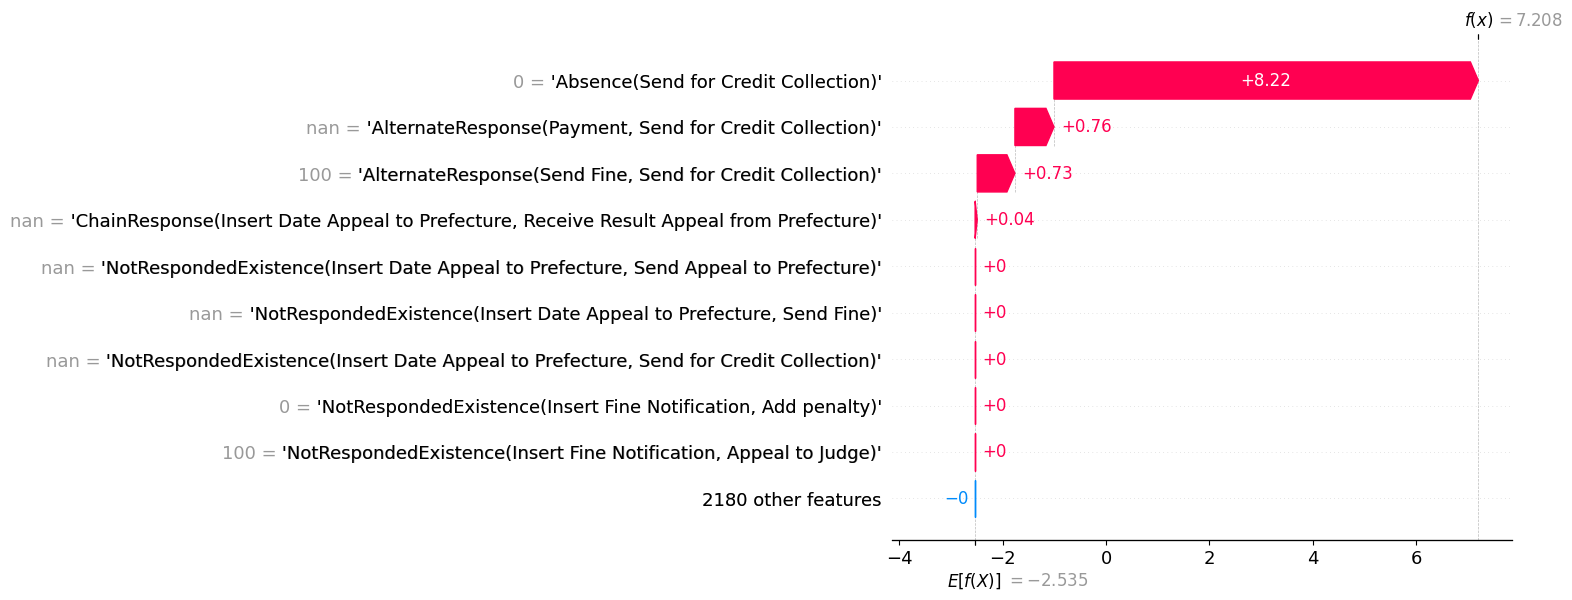

In [25]:
# SHAP values for the selected instance and class 
shap.waterfall_plot(shap.Explanation(values=shap_values_best_class0, 
                                     base_values=expected_value, 
                                     data=best_class0_all_values),
                                     max_display=10,
                                     show=True)

In [103]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [16]:
#1->dismissed

In [17]:
best_class1.index[0]

'N58131'

In [18]:
original_log[original_log["case:concept:name"]==best_class1.index[0]]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
192600,33.60,557,NIL,Create Fine,A,0.0,complete,2004-07-12 00:00:00+00:00,157.0,0.0,N58131,NaN,NaN,NaN,NaN,NaN
192601,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2004-11-10 00:00:00+00:00,NaN,NaN,N58131,16.0,NaN,NaN,NaN,NaN
192602,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2004-11-17 00:00:00+00:00,NaN,NaN,N58131,NaN,P,P,NaN,NaN
192603,NaN,NaN,NaN,Insert Date Appeal to Prefecture,NaN,NaN,complete,2004-11-19 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,NaN
192604,NaN,NaN,NIL,Send Appeal to Prefecture,NaN,NaN,complete,2004-12-17 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,NaN
192605,68.77,NaN,NaN,Add penalty,NaN,NaN,complete,2005-01-16 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,NaN
192606,NaN,NaN,NaN,Receive Result Appeal from Prefecture,NaN,NaN,complete,2005-01-18 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,NaN
192607,NaN,0,G,Appeal to Judge,NaN,NaN,complete,2005-03-04 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,0.0
192608,NaN,NaN,NaN,Notify Result Appeal to Offender,NaN,NaN,complete,2005-03-24 00:00:00+00:00,NaN,NaN,N58131,NaN,NaN,NaN,NaN,NaN


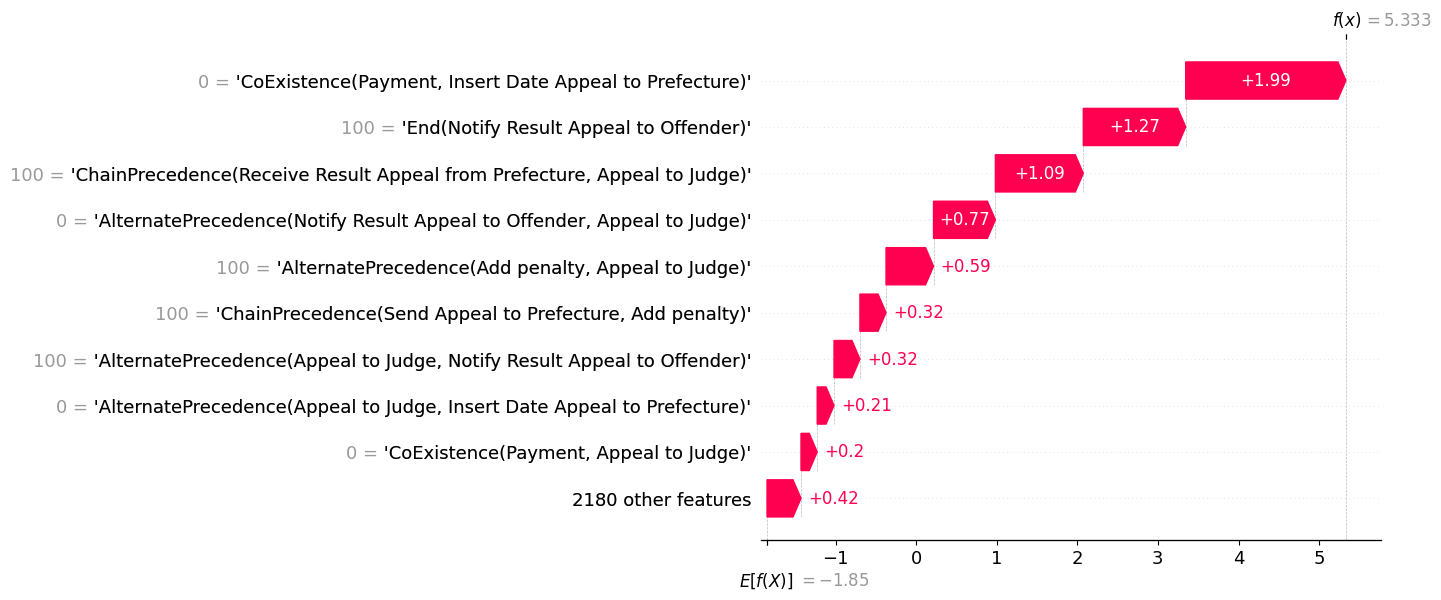

In [21]:
plotTop10features(shap_values_training,best_class1.index[0], X_train_reset_index, X_train, 1, explainer_training )

In [112]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
#class 2-> paid_full

In [22]:
original_log[original_log["case:concept:name"]==best_class2.index[0]]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
17608,36.0,564,NIL,Create Fine,A,0.0,complete,2007-07-14 00:00:00+00:00,157.0,0.0,A18359,NaN,NaN,NaN,NaN,NaN
17609,NaN,NaN,NaN,Payment,NaN,36.0,complete,2007-08-16 00:00:00+00:00,NaN,NaN,A18359,NaN,NaN,NaN,36.0,NaN
17610,NaN,NaN,NaN,Payment,NaN,109.0,complete,2008-02-20 00:00:00+00:00,NaN,NaN,A18359,NaN,NaN,NaN,73.0,NaN


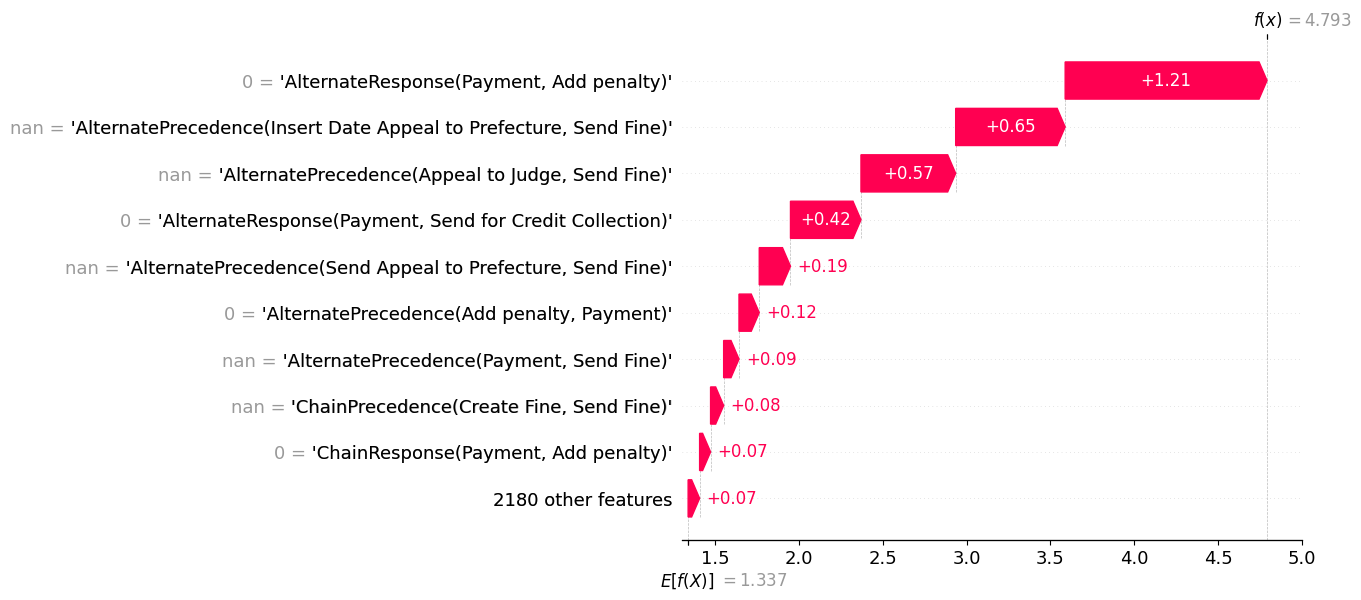

In [23]:
plotTop10features(shap_values_training,best_class2.index[0], X_train_reset_index, X_train, 2, explainer_training )

In [24]:
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
original_log[original_log["case:concept:name"]==best_class3.index[0]]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
453182,31.3,811,NIL,Create Fine,A,0.0,complete,2000-08-18 00:00:00+00:00,157.0,0.0,S56590,NaN,NaN,NaN,NaN,NaN
453183,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2000-09-27 00:00:00+00:00,NaN,NaN,S56590,6.46,NaN,NaN,NaN,NaN


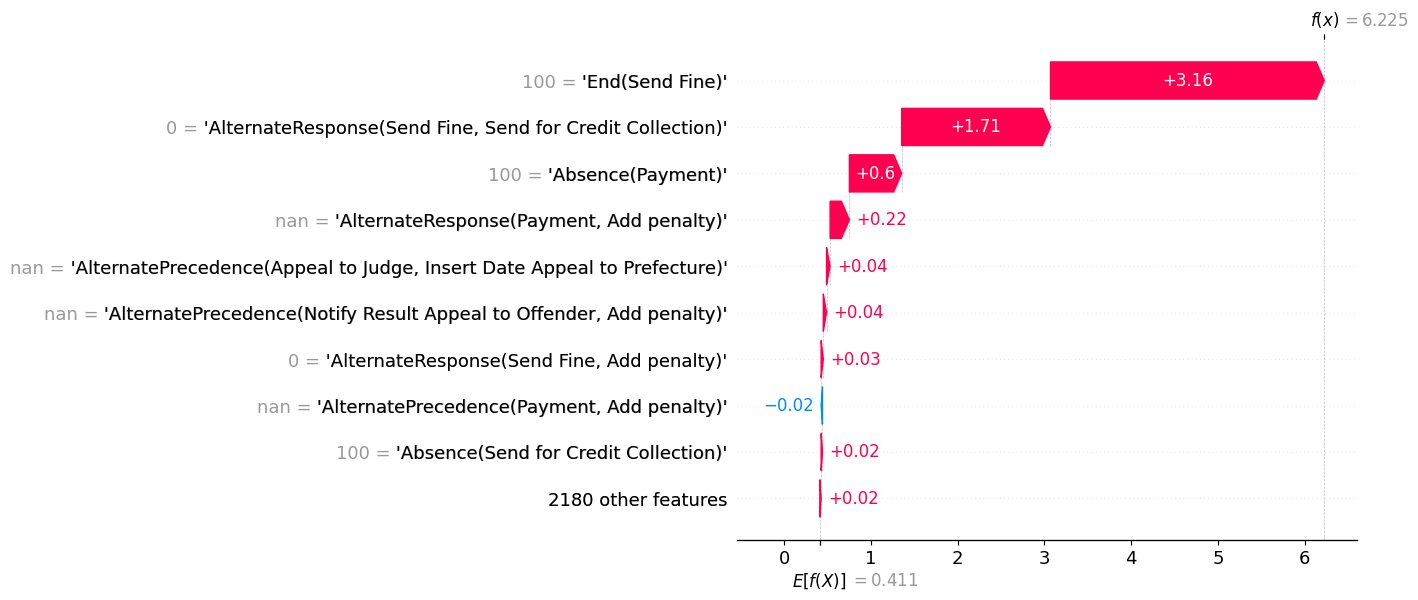

In [29]:
plotTop10features(shap_values_training,best_class3.index[0], X_train_reset_index, X_train, 3, explainer_training)